<a href="https://colab.research.google.com/github/Mahi-singh-solanki/Image-Recognition-Ml/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahipalsinghsolanki","key":"f23257d7d280974c493a4ccc9a821b69"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(f"Train shape:{x_train.shape},Test shape:{x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape:(60000, 28, 28),Test shape:(10000, 28, 28)


In [7]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(f"Train reshaped:{x_train.shape}")

Train reshaped:(60000, 28, 28, 1)


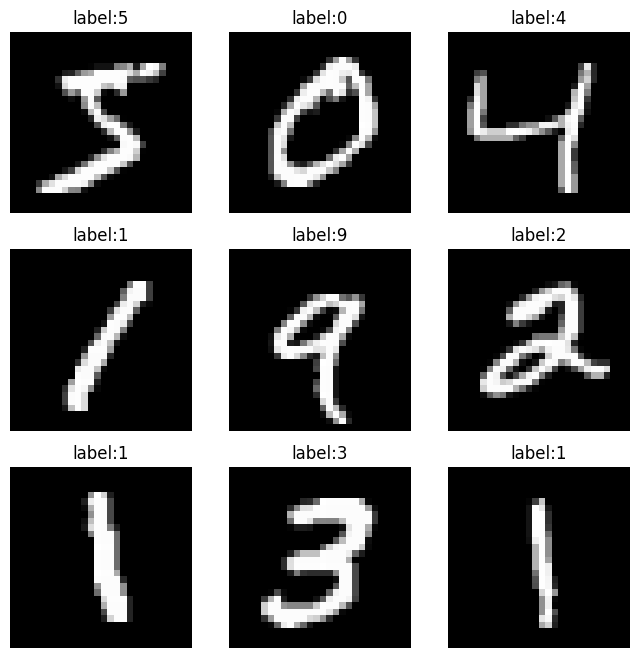

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(f"label:{y_train[i]}")
  plt.axis("off")
plt.show()

In [9]:
(x_train_c10,y_train_c10),(x_test_c10,y_test_c10)=tf.keras.datasets.cifar10.load_data()
x_train_c10=x_train_c10/255.0
x_test_c10=x_test_c10/255.0
print(f"CIFAR 10 Train shape:{x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
CIFAR 10 Train shape:(50000, 32, 32, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8979 - loss: 0.3363 - val_accuracy: 0.9824 - val_loss: 0.0582
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9837 - loss: 0.0523 - val_accuracy: 0.9858 - val_loss: 0.0475
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9898 - loss: 0.0326 - val_accuracy: 0.9841 - val_loss: 0.0542
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.9865 - val_loss: 0.0467
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9879 - val_loss: 0.0465


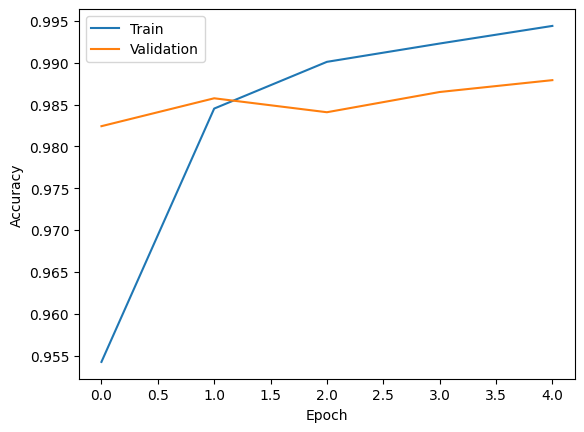

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy:{test_acc.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9853 - loss: 0.0409
Test Accuracy:{test_acc.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
from tensorflow.keras.layers import Dropout
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.3443 - loss: 1.7843 - val_accuracy: 0.5232 - val_loss: 1.2766
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5310 - loss: 1.3184 - val_accuracy: 0.5998 - val_loss: 1.1276
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5857 - loss: 1.1747 - val_accuracy: 0.6280 - val_loss: 1.0761
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6159 - loss: 1.0983 - val_accuracy: 0.6330 - val_loss: 1.0301
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6366 - loss: 1.0451 - val_accuracy: 0.5658 - val_loss: 1.2888
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6502 - loss: 1.0147 - val_accuracy: 0.6647 - val_loss: 0.9979
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6564 - loss: 0.9825 - val_accuracy: 0.6761 - val_loss: 0.9336
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6716 - loss: 0.95

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.62      0.93      0.74      1000
           2       0.79      0.38      0.51      1000
           3       0.56      0.39      0.46      1000
           4       0.74      0.54      0.62      1000
           5       0.74      0.48      0.59      1000
           6       0.52      0.88      0.66      1000
           7       0.80      0.66      0.72      1000
           8       0.86      0.73      0.79      1000
           9       0.58      0.86      0.69      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.65     10000
weighted avg       0.69      0.66      0.65     10000



<function matplotlib.pyplot.show(close=None, block=None)>

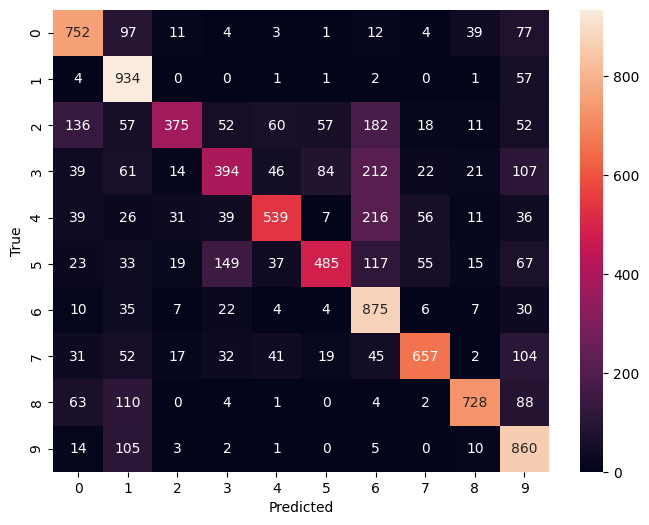

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 53% 116M/218M [00:00<00:00, 1.20GB/s]
100% 218M/218M [00:00<00:00, 819MB/s] 


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-and-cats')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-and-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-and-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False
model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 121ms/step - accuracy: 0.7766 - loss: 0.5588 - val_accuracy: 0.7985 - val_loss: 0.5087
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7978 - loss: 0.4997 - val_accuracy: 0.7985 - val_loss: 0.5132
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7978 - loss: 0.4910 - val_accuracy: 0.7985 - val_loss: 0.5163
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.8060 - loss: 0.4634 - val_accuracy: 0.7970 - val_loss: 0.5201
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.8020 - loss: 0.4495 - val_accuracy: 0.7975 - val_loss: 0.5379


In [22]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 104s 232ms/step - accuracy: 0.8051 - loss: 0.4766 - val_accuracy: 0.7945 - val_loss: 0.5270
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 129ms/step - accuracy: 0.8001 - loss: 0.4534 - val_accuracy: 0.7920 - val_loss: 0.5301
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.8021 - loss: 0.4315 - val_accuracy: 0.7870 - val_loss: 0.5363


In [23]:
model.save('mobilenet_cat_dogs.h5')
#To laod
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cat_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step


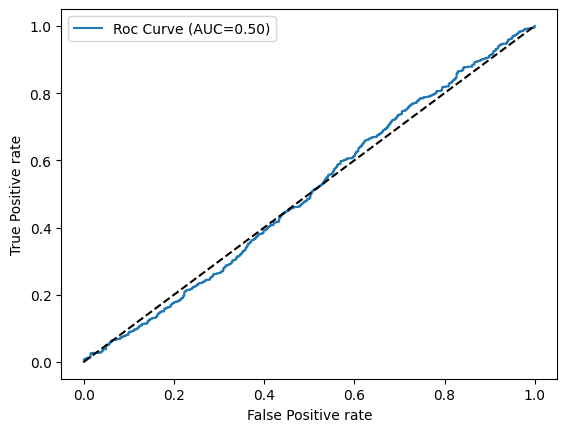

In [24]:
from sklearn .metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'Roc Curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

In [30]:
from google.colab import files
uploaded = files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'dogs.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")
print(prediction[0][0])

Saving dogs.jpg to dogs (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: Dog
0.6737528


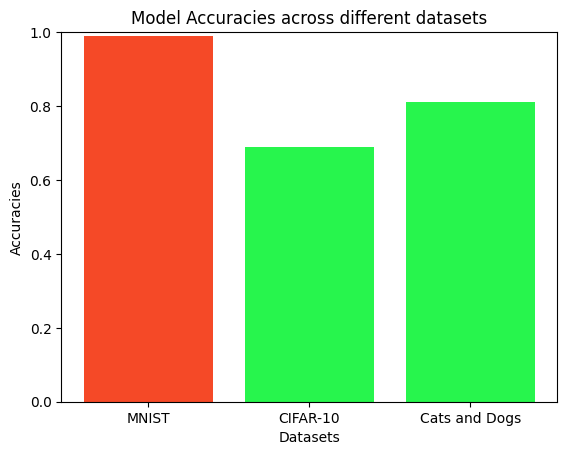

In [29]:
import matplotlib.pyplot as plt
datasets=['MNIST','CIFAR-10','Cats and Dogs']
accuracies=[0.99,0.69,.81]
plt.bar(datasets,accuracies,color=['#F54927','#27F54D','#27F54D'])
plt.title('Model Accuracies across different datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracies')
plt.ylim(0,1)
plt.show()